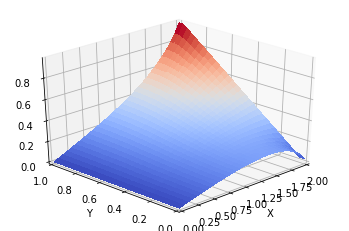

In [10]:
##########2D Laplace##########
####This code converges on a solution to Laplace's equation in two dimensions using the finite difference method.
####
####Boundary Conditions:
####  p = 0 @ x = 0
####  p = y @ x = 2
####  dp/dy = 0 @ y = 0 & y = 1
###############################
##Requires python >= 2.7, numpy and matplotlib
##############################

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy 

plt.ion()

##variable declarations
nx = 31
ny = 31
c = 1
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)


##initial conditions
p = numpy.zeros((ny,nx)) ##create a XxY vector of 0's
pn = numpy.zeros((ny,nx)) ##create a XxY vector of 0's


##plotting aids
x = numpy.linspace(0,2,nx)
y = numpy.linspace(0,1,ny)

##boundary conditions
p[:,0] = 0		##p = 0 @ x = 0
p[:,-1] = y		##p = y @ x = 2
p[0,:] = p[1,:]		##dp/dy = 0 @ y = 0
p[-1,:] = p[-2,:]	##dp/dy = 0 @ y = 1

##Initialize animation (plot ICs)
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = numpy.meshgrid(x,y)
surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)
ax.set_xlim(0,2)
ax.set_ylim(0,1)
ax.view_init(30,225)
plt.draw()

l1norm = 1
n = 1

while l1norm > .00001:
	pn[:] = p[:]
	p[1:-1,1:-1] = (dy**2*(pn[2:,1:-1]+pn[0:-2,1:-1])+dx**2*(pn[1:-1,2:]+pn[1:-1,0:-2]))/(2*(dx**2+dy**2)) 
	p[0,0] = (dy**2*(pn[1,0]+pn[-1,0])+dx**2*(pn[0,1]+pn[0,-1]))/(2*(dx**2+dy**2))
	p[-1,-1] = (dy**2*(pn[0,-1]+pn[-2,-1])+dx**2*(pn[-1,0]+pn[-1,-2]))/(2*(dx**2+dy**2)) 

	p[:,0] = 0		##p = 0 @ x = 0
	p[:,-1] = y		##p = y @ x = 2
	p[0,:] = p[1,:]		##dp/dy = 0 @ y = 0
	p[-1,:] = p[-2,:]	##dp/dy = 0 @ y = 1
	l1norm = (numpy.sum(numpy.abs(p[:])-numpy.abs(pn[:])))/numpy.sum(numpy.abs(pn[:]))
	n = n+1
	if n%40 == 0:
		surf.remove()
		surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.coolwarm,
			linewidth=0, antialiased=False)
		ax.set_xlabel('X')
		ax.set_ylabel('Y')
		ax.view_init(30,225)
		plt.draw()
surf.remove()
surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.coolwarm,
	linewidth=0, antialiased=False)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.view_init(30,225)

All Modules Imported 



V is  [0.1        0.20656772 0.31055431 0.41191227 0.5105917  0.60654011
 0.69970225 0.79001982 0.87743124 0.96187135 1.04327104 1.12155693
 1.19665091 1.26846965 1.33692406 1.40191865 1.46335081 1.52110994
 1.57507649 1.62512075 1.67110158 1.71286469 1.75024077 1.78304316
 1.81106497 1.83407564 1.85181659 1.86399585 1.87028111 1.87029082
 1.86358258]
Iteration number :  2
Iteration number :  3
Iteration number :  4
Iteration number :  5
Iteration number :  6
Iteration number :  7
Iteration number :  8
Iteration number :  9
Iteration number :  10
Iteration number :  11
Iteration number :  12
Iteration number :  13
Iteration number :  14
Iteration number :  15
Iteration number :  16
Iteration number :  17
Iteration number :  18
Iteration number :  19
Iteration number :  20
Iteration number :  21
Iteration number :  22
Iteration number :  23
Iteration number :  24
Iteration number :  25
Iteration number :  26
Iteration number :  27
Iteration number :  28
Iteratio

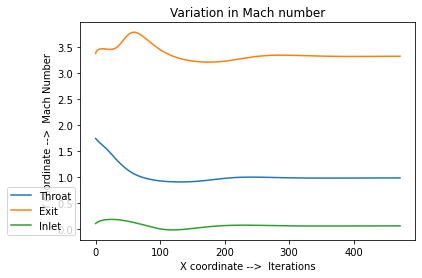

In [12]:
#This code solves the flow in a 1D convergent divergent nozzle using
#finite difference method

import numpy as np; import matplotlib.pyplot as plt
print('All Modules Imported \n\n\n')

grid=np.linspace(0,3,31)    #grid set

A=1 + 2.2 * (grid-1.5)**2   #Area
Ro=1- 0.3146*grid           #Density
T = 1 - 0.2314*grid         #Temperature
V= (0.1 + 1.09*grid)*np.sqrt(T)  #Velocity
M=V/np.sqrt(T)
Mdata=[M[15]]
Mdataex=[M[30]]
Mdatain=[M[0]]
print('V is ',V)


t=0
itr=1

while(1):

    delt=(0.5*(0.1/(np.sqrt(T)+V))).min()


    i=1

    RoDdata=[0]
    VDdata=[0]
    TDdata=[0]


    while i<30:
        RoD=(((-Ro[i]*((V[i+1]-V[i])/0.1)))-((Ro[i]*V[i]*((np.log(A[i+1])-np.log(A[i]))/0.1)))-((V[i]*((Ro[i+1]-Ro[i])/0.1))))
        RoDdata.append(RoD)
        VD=(-V[i]*((V[i+1]-V[i])/0.1)) - (((T[i+1]-T[i])/0.14)+((T[i]*Ro[i+1]-T[i]*Ro[i])/(0.14*Ro[i])))
        VDdata.append(VD)
        TD=-V[i]*((T[i+1]-T[i])/0.1)-((1.4-1)*T[i])*( ((V[i+1]-V[i])/0.1) + V[i]*((np.log(A[i+1])-np.log(A[i]))/0.1))
        TDdata.append(TD)
        i=i+1


    RoDdata.append(0)
    VDdata.append(0)
    TDdata.append(0)
 

    Robar=Ro + np.asarray(RoDdata) * delt
    Vbar=V + np.asarray(VDdata) * delt
    Tbar=T + np.asarray(TDdata) * delt


    i=1

    RoDdata2=[0]
    VDdata2=[0]
    TDdata2=[0]


    while i<30:
        RoD=(((-Robar[i]*((Vbar[i]-Vbar[i-1])/0.1)))-((Robar[i]*Vbar[i]*((np.log(A[i])-np.log(A[i-1]))/0.1)))-((Vbar[i]*((Robar[i]-Robar[i-1])/0.1))))
        RoDdata2.append(RoD)
        VD=(-Vbar[i]*((Vbar[i]-Vbar[i-1])/0.1)) - (((Tbar[i]-Tbar[i-1])/0.14)+((Tbar[i]*Robar[i]-Tbar[i]*Robar[i-1])/(0.14*Robar[i])))
        VDdata2.append(VD)
        TD=-Vbar[i]*((Tbar[i]-Tbar[i-1])/0.1)-((1.4-1)*Tbar[i])*( ((Vbar[i]-Vbar[i-1])/0.1) + Vbar[i]*((np.log(A[i])-np.log(A[i-1]))/0.1))
        TDdata2.append(TD)
        i=i+1


    RoDdata2.append(0)
    VDdata2.append(0)
    TDdata2.append(0)



    RoDavg=0.5 * (np.asarray(RoDdata) + np.asarray(RoDdata2))
    VDavg=0.5 * (np.asarray(VDdata) + np.asarray(VDdata2))
    TDavg=0.5 * (np.asarray(TDdata) + np.asarray(TDdata2))



    Ro=Ro + np.asarray(RoDavg) * delt
    V=V + np.asarray(VDavg) * delt
    T=T + np.asarray(TDavg) * delt



    V[0]= 2*V[1] - V[2]
    Ro[0]= 2*Ro[1] - Ro[2]
    T[0]= 2*T[1] - T[2]

    V[30]= 2*V[29] - V[28]
    Ro[30]= 2*Ro[29] - Ro[28]
    T[30]= 2*T[29] - T[28]

    P = Ro * T
 
    M=V/np.sqrt(T)
 
    Mdata.append(M[15])
    Mdataex.append(M[30])
    Mdatain.append(M[0])
 


    t= t + delt

    itr=itr+1
    print('Iteration number : ',itr)

    if (np.absolute(Mdata[-1]-Mdata[-2])) < 0.0000001:
        break
 
    

print('\n\n P is ',P)

print('\n\n mach no. is ',M)

print('\n\n V, Ro & T are ',V,'\n\n',  Ro,'\n\n', T)

print('\n\n Iterations required = ',itr-1, '\n\n Time = ',t, ' seconds')

plt.plot(np.arange(itr),Mdata,'-',np.arange(itr),Mdataex,'-',np.arange(itr),Mdatain,'-')
plt.xlabel('X coordinate -->  Iterations')
plt.ylabel('Y coordinate -->  Mach Number')
plt.title('Variation in Mach number')
plt.legend(['Throat','Exit','Inlet'],bbox_to_anchor=(0,0),loc=4)
plt.show()


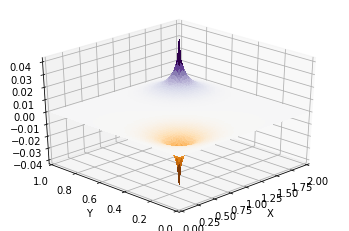

In [17]:
##########2D Poisson##########
####This code converges on a solution to Poisson's equation in two dimensions using the finite difference method.
####
####Boundary Conditions:
####  p = 0 @ all borders
####  b = 0 everywhere except at (.5, .5) and (1.5, 1.5)
###############################
##Requires python >= 2.7, numpy and matplotlib
##############################
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy 

plt.ion()

##variable declarations
nx = 81
ny = 81
nt = 300
c = 1
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
sigma = .5
dt = sigma*dx*dy


##initial conditions
p = numpy.zeros((ny,nx)) ##create a XxY vector of 0's
pn = numpy.zeros((ny,nx)) ##create a XxY vector of 0's
b = numpy.zeros((ny,nx))

##plotting aids
x = numpy.linspace(0,2,nx)
y = numpy.linspace(0,1,ny)

##boundary conditions
p[:,0] = 0		##p = 0 @ x = 0
p[:,-1] = 0		##p = 0 @ x = 2
p[0,:] = 0		##p = 0 @ y = 0
p[-1,:] = 0		##p = 0 @ y = 1

b[int(numpy.round(nx/4.0)),int(numpy.round(ny/4.0))] = 100
b[int(numpy.round(3*nx/4.0)),int(numpy.round(3*ny/4.0))] = -100

##Initialize animation (plot ICs)
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = numpy.meshgrid(x,y)


##time loop
for n in range(nt):
	pn[:] = p[:]
	p[1:-1,1:-1] = (dy**2*(pn[2:,1:-1]+pn[0:-2,1:-1])+dx**2*(pn[1:-1,2:]+pn[1:-1,0:-2])-b[1:-1,1:-1]*dx**2*dy**2)/(2*(dx**2+dy**2)) 
	p[0,0] = (dy**2*(pn[1,0]+pn[-1,0])+dx**2*(pn[0,1]+pn[0,-1])-b[0,0]*dx**2*dy**2)/(2*(dx**2+dy**2))
	p[-1,-1] = (dy**2*(pn[0,-1]+pn[-2,-1])+dx**2*(pn[-1,0]+pn[-1,-2])-b[-1,-1]*dx**2*dy**2)/(2*(dx**2+dy**2)) 

	p[:,0] = 0		##p = 0 @ x = 0
	p[:,-1] = 0		##p = 0 @ x = 2
	p[0,:] = 0		##p = 0 @ y = 0
	p[-1,:] = 0		##p = 0 @ y = 1

surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap='PuOr',
        linewidth=0, antialiased=False)
#surf = ax.plot_wireframe(X,Y,p[:])
ax.set_xlim(0,2)
ax.set_ylim(0,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.view_init(30,225)
plt.draw()